In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from utils import decode_fnc, plot_fnc, mix_colors
os.chdir('/data/users4/xli/interpolation')
from models.vae import VAE
os.chdir('/data/users4/xli/interpolation/visualization')

In [2]:
data_path = '/data/users4/xli/interpolation/results'
res_path = '/data/users4/xli/interpolation/visualization'

n_sub = 225
n_sz = 105
n_asd = 113
n_window_sz = 137
n_window_asd = 168
data_dim = 1378
latent_dim = 2
n_state = 5

hidden_dim_sz = [512, 256, 128, 64, 32, 16, 8]
n_layer_sz = 7
seed_sz = 8
res_path_sz = os.path.join(data_path, f'dfnc_sz/vae/hypopt/layer{n_layer_sz}/seed{seed_sz}')
z_sz = np.load(os.path.join(res_path_sz, 'z_train.npy'))
vae_label_sz = np.load(os.path.join(res_path_sz, 'vae_kmeans_label.npy'))
vae_sorted_state_ind_sz = np.load(os.path.join(res_path_sz, 'vae_sorted_state_ind.npy'))

hidden_dim_asd = [256, 128, 64, 32, 16]
n_layer_asd = 5
seed_asd = 9
res_path_asd = os.path.join(data_path, f'dfnc_asd/vae/hypopt/layer{n_layer_asd}/seed{seed_asd}')
z_asd = np.load(os.path.join(res_path_asd, 'z_train.npy'))
vae_label_asd = np.load(os.path.join(res_path_asd, 'vae_kmeans_label.npy'))
vae_sorted_state_ind_asd = np.load(os.path.join(res_path_asd, 'vae_sorted_state_ind.npy'))

In [3]:
model_sz = VAE(input_dim=data_dim, 
            latent_dim=latent_dim, 
            hidden_dims=hidden_dim_sz, 
            seed=seed_sz)
ckpt_file_sz = os.path.join(res_path_sz, f'vae_layer{n_layer_sz}_dim{hidden_dim_sz}_bs512_lr0.001_seed{seed_sz}.pt')
checkpoint_sz = torch.load(ckpt_file_sz, map_location=torch.device('cpu'), weights_only=False)
model_sz.load_state_dict(checkpoint_sz)
model_sz.eval()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=1378, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.5)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.5)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): LeakyReLU(negative_slope=0.5)
    (10): Linear(in_features=32, out_features=16, bias=True)
    (11): LeakyReLU(negative_slope=0.5)
    (12): Linear(in_features=16, out_features=8, bias=True)
    (13): LeakyReLU(negative_slope=0.5)
  )
  (fc_mean): Linear(in_features=8, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=8, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linea

In [4]:
model_asd = VAE(input_dim=data_dim, 
            latent_dim=latent_dim, 
            hidden_dims=hidden_dim_asd, 
            seed=seed_asd)
ckpt_file_asd = os.path.join(res_path_asd, f'vae_layer{n_layer_asd}_dim{hidden_dim_asd}_bs512_lr0.001_seed{seed_asd}.pt')
checkpoint_asd = torch.load(ckpt_file_asd, map_location=torch.device('cpu'), weights_only=False)
model_asd.load_state_dict(checkpoint_asd)
model_asd.eval()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=1378, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.5)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.5)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): LeakyReLU(negative_slope=0.5)
  )
  (fc_mean): Linear(in_features=16, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=16, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.5)
    (6): Linear(

0.7948717948717948
0.5872134854558536
0.5207682000893256
0.22790368271954675
0.30514266188279515
0.7055253912488023
0.5029158993247391
0.5382598331346842
0.371939477303989
0.35049351654731953


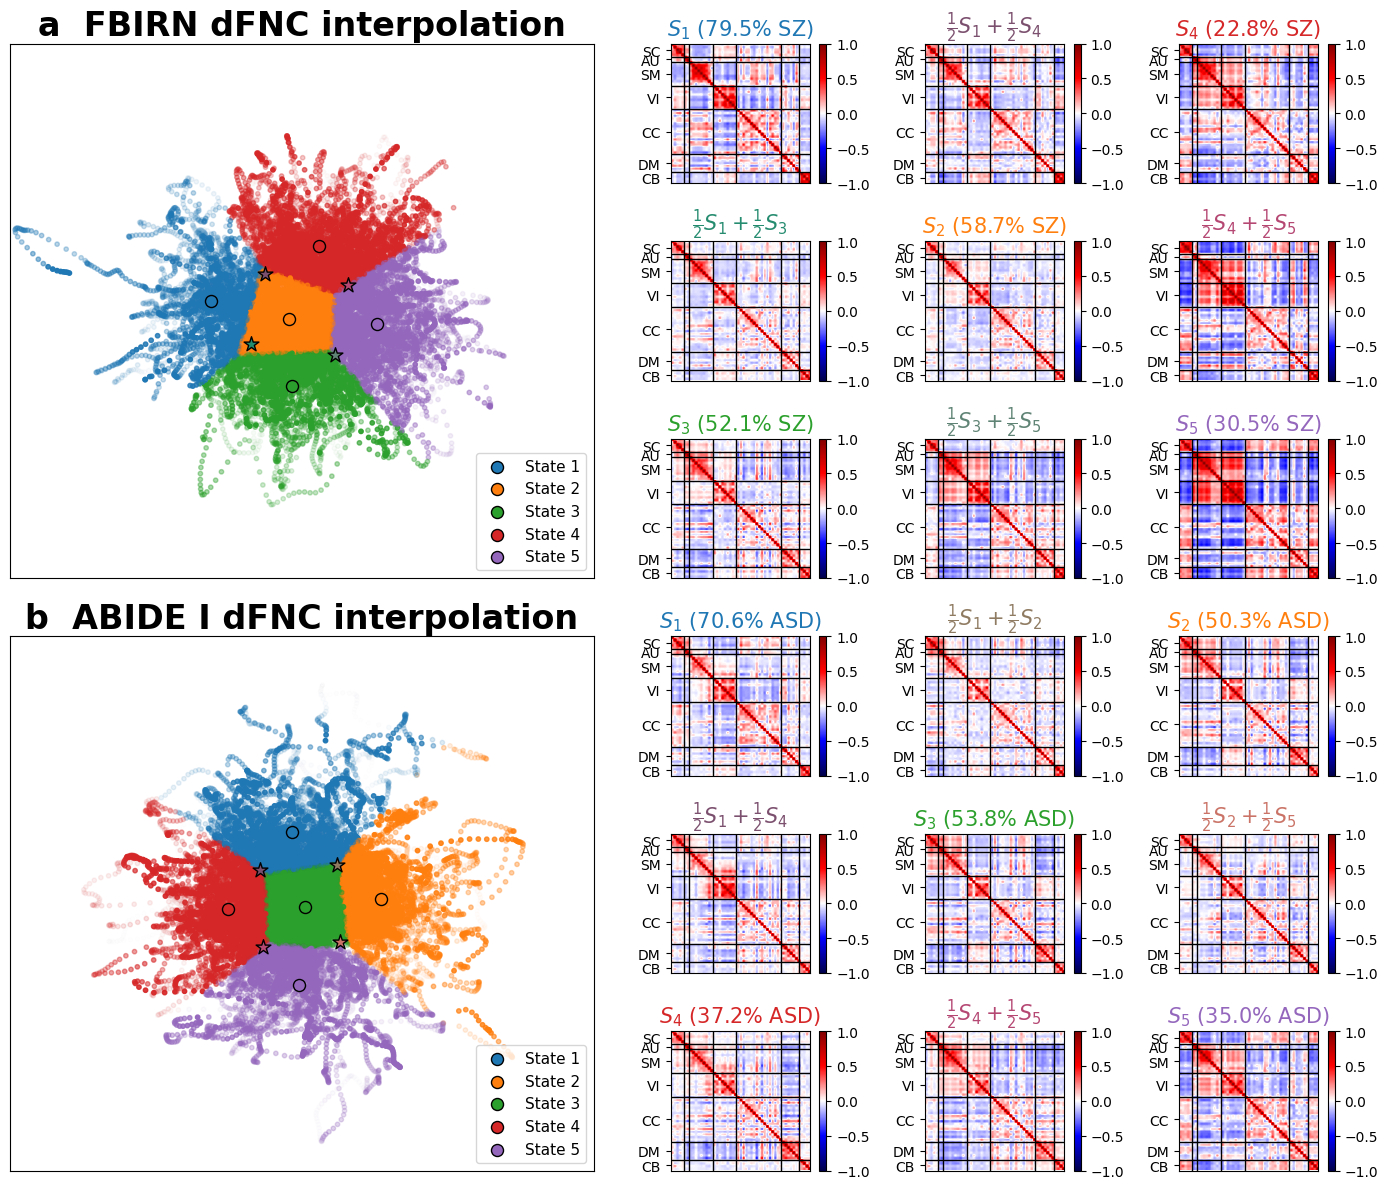

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(14,12), gridspec_kw={'width_ratios': [1]*3+[1.25]*3})
gs = axes[0, 0].get_gridspec()

for i in range(3):
    for ax in axes[:3, i]:
        ax.remove()
axbig = fig.add_subplot(gs[:3, :3])

color_mapping = [plt.cm.tab20(2*i) for i in range(n_state)]

color_list_sz = []
for i in range(len(vae_label_sz)):
    c = color_mapping[np.where(vae_sorted_state_ind_sz==vae_label_sz[i])[0][0]]
    color_list_sz.append(c)

lim = 5.2
vae_label_sz_pt = vae_label_sz[:n_sz*n_window_sz]
vae_label_sz_hc = vae_label_sz[n_sz*n_window_sz:]

xy = np.vstack([z_sz[:,0], z_sz[:,1]])
kde = gaussian_kde(xy)
density = kde(xy)
density_norm_sz = density/np.max(density)

axbig.scatter(z_sz[:,0][::-1], z_sz[:,1][::-1], c=color_list_sz[::-1], s=10, alpha=density_norm_sz)
centroid_list = []
for i in np.arange(n_state):
    print(np.sum(vae_label_sz_pt==vae_sorted_state_ind_sz[i])/(np.sum(vae_label_sz_pt==vae_sorted_state_ind_sz[i])+np.sum(vae_label_sz_hc==vae_sorted_state_ind_sz[i])))
    centroid = np.mean(z_sz[vae_label_sz==vae_sorted_state_ind_sz[i], :], axis=0)
    centroid_list.append(centroid)
    axbig.scatter(centroid[0], centroid[1], facecolor=color_mapping[i], edgecolor='k', s=75, marker='o', label=f'State {i+1}')
axbig.legend(loc='lower right', fontsize=11)
axbig.set_title('a  FBIRN dFNC interpolation', color="k", fontweight="bold", fontsize=24)
axbig.set_xlim([-lim,lim])
axbig.set_ylim([-lim,lim])
axbig.set_xticks([])
axbig.set_yticks([])

anchor = np.zeros((3,3,2))
for i in range(2):
    anchor[0,:,i] = np.linspace(centroid_list[0][i], centroid_list[3][i], 3)
    anchor[2,:,i] = np.linspace(centroid_list[2][i], centroid_list[4][i], 3)
    anchor[1,0,i] = np.linspace(centroid_list[0][i], centroid_list[2][i], 3)[1]
    anchor[1,2,i] = np.linspace(centroid_list[3][i], centroid_list[4][i], 3)[1]
anchor[1,1,:] = centroid_list[1]

title_list = [['$S_1$ (79.5% SZ)', '$\\frac{1}{2}S_1+\\frac{1}{2}S_4$', '$S_4$ (22.8% SZ)'],
              ['$\\frac{1}{2}S_1+\\frac{1}{2}S_3$', '$S_2$ (58.7% SZ)', '$\\frac{1}{2}S_4+\\frac{1}{2}S_5$'],
              ['$S_3$ (52.1% SZ)', '$\\frac{1}{2}S_3+\\frac{1}{2}S_5$', '$S_5$ (30.5% SZ)']]

state_color_list_sz = [[color_mapping[0], mix_colors(color_mapping[0], color_mapping[3], 0.5), color_mapping[3]],
              [mix_colors(color_mapping[0], color_mapping[2], 0.5), color_mapping[1], mix_colors(color_mapping[3], color_mapping[4], 0.5)],
              [color_mapping[2], mix_colors(color_mapping[2], color_mapping[4], 0.5), color_mapping[4]]]

for i in range(3):
    for j in range(3):
        if ((i==1) or (j==1)) and not ((i==1) and (j==1)):
            axbig.scatter(anchor[i,j,0], anchor[i,j,1], color=state_color_list_sz[i][j], edgecolor='k', s=125, marker='*')
        fnc = decode_fnc(anchor[i,j,0], anchor[i,j,1], model_sz)
        plot_fnc(fnc, axes[i,j+3], title=f"{title_list[i][j]}", title_color=state_color_list_sz[i][j], title_fontsize=15, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

for i in range(3):
    for ax in axes[3:, i]:
        ax.remove()
axbig = fig.add_subplot(gs[3:, :3])

color_list_asd = []
for i in range(len(vae_label_asd)):
    c = color_mapping[np.where(vae_sorted_state_ind_asd==vae_label_asd[i])[0][0]]
    color_list_asd.append(c)

lim = 5.2
vae_label_asd_pt = vae_label_asd[:n_asd*n_window_asd]
vae_label_asd_hc = vae_label_asd[n_asd*n_window_asd:]

xy = np.vstack([z_asd[:,0], z_asd[:,1]])
kde = gaussian_kde(xy)
density = kde(xy)
density_norm_asd = density/np.max(density)

axbig.scatter(z_asd[:,0][::-1], z_asd[:,1][::-1], c=color_list_asd[::-1], s=10, alpha=density_norm_asd)
centroid_list = []
for i in np.arange(n_state):
    print(np.sum(vae_label_asd_pt==vae_sorted_state_ind_asd[i])/(np.sum(vae_label_asd_pt==vae_sorted_state_ind_asd[i])+np.sum(vae_label_asd_hc==vae_sorted_state_ind_asd[i])))
    centroid = np.mean(z_asd[vae_label_asd==vae_sorted_state_ind_asd[i], :], axis=0)
    centroid_list.append(centroid)
    axbig.scatter(centroid[0], centroid[1], facecolor=color_mapping[i], edgecolor='k', s=75, marker='o', label=f'State {i+1}')
axbig.legend(loc='lower right', fontsize=11)
axbig.set_title('b  ABIDE I dFNC interpolation', color="k", fontweight="bold", fontsize=24)
axbig.set_xlim([-lim,lim])
axbig.set_ylim([-lim,lim])
axbig.set_xticks([])
axbig.set_yticks([])

anchor = np.zeros((3,3,2))
for i in range(2):
    anchor[0,:,i] = np.linspace(centroid_list[0][i], centroid_list[1][i], 3)
    anchor[2,:,i] = np.linspace(centroid_list[3][i], centroid_list[4][i], 3)
    anchor[1,0,i] = np.linspace(centroid_list[0][i], centroid_list[3][i], 3)[1]
    anchor[1,2,i] = np.linspace(centroid_list[1][i], centroid_list[4][i], 3)[1]
anchor[1,1,:] = centroid_list[1]

title_list = [['$S_1$ (70.6% ASD)', '$\\frac{1}{2}S_1+\\frac{1}{2}S_2$', '$S_2$ (50.3% ASD)'],
              ['$\\frac{1}{2}S_1+\\frac{1}{2}S_4$', '$S_3$ (53.8% ASD)', '$\\frac{1}{2}S_2+\\frac{1}{2}S_5$'],
              ['$S_4$ (37.2% ASD)', '$\\frac{1}{2}S_4+\\frac{1}{2}S_5$', '$S_5$ (35.0% ASD)']]

state_color_list_asd = [[color_mapping[0], mix_colors(color_mapping[0], color_mapping[1], 0.5), color_mapping[1]],
                        [mix_colors(color_mapping[0], color_mapping[3], 0.5), color_mapping[2], mix_colors(color_mapping[1], color_mapping[4], 0.5)],
                        [color_mapping[3], mix_colors(color_mapping[3], color_mapping[4], 0.5), color_mapping[4]]]

for i in range(3):
    for j in range(3):
        if ((i==1) or (j==1)) and not ((i==1) and (j==1)):
            axbig.scatter(anchor[i,j,0], anchor[i,j,1], color=state_color_list_asd[i][j], edgecolor='k', s=125, marker='*')
        fnc = decode_fnc(anchor[i,j,0], anchor[i,j,1], model_asd)
        plot_fnc(fnc, axes[i+3,j+3], title=f"{title_list[i][j]}", title_color=state_color_list_asd[i][j], title_fontsize=15, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

plt.tight_layout()
plt.savefig('interpolation_latent_space_dfnc.pdf')

/tmp/ipykernel_943205/1044161409.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


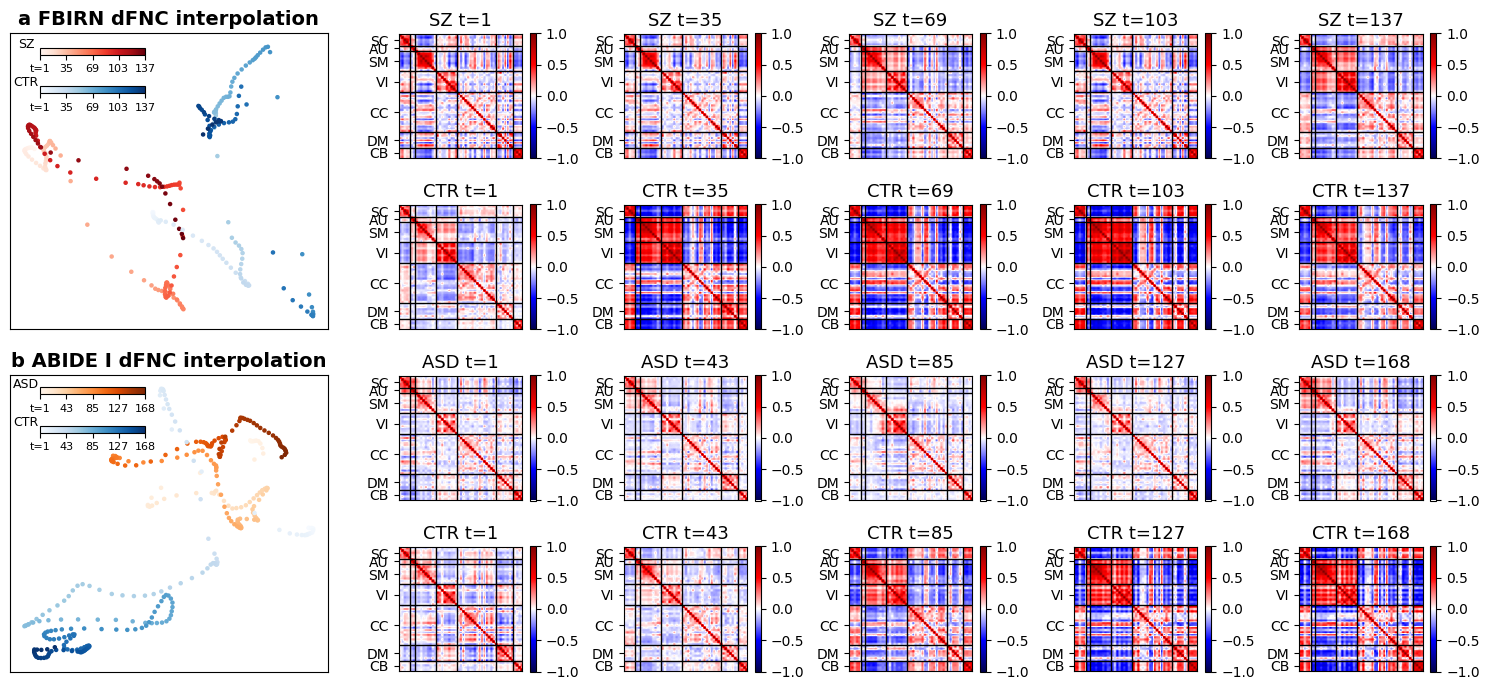

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(15,7), gridspec_kw={'width_ratios': [1]*2+[1.25]*5})
gs = axes[0, 0].get_gridspec()

# SZ
ind_list_sz = [n_window_sz//4*i for i in range(4)]
ind_list_sz += [n_window_sz-1]
pt_start_ind = 0*n_window_sz
hc_start_ind = (n_sz+2)*n_window_sz
z_sz_pt = z_sz[pt_start_ind:pt_start_ind+n_window_sz]
z_sz_hc = z_sz[hc_start_ind:hc_start_ind+n_window_sz]

color_sz = plt.cm.Reds(np.linspace(0,1,n_window_sz))
for i in range(n_sz-1):
    color_sz = np.concatenate([color_sz, plt.cm.Reds(np.linspace(0,1,n_window_sz))])
for i in range(n_sub-n_sz):
    color_sz = np.concatenate([color_sz, plt.cm.Blues(np.linspace(0,1,n_window_sz))])

# remove the underlying axes
for i in range(2):
    for ax in axes[:2, i]:
        ax.remove()
axbig = fig.add_subplot(gs[:2, :2])
ax_sz_pt = axbig.scatter(z_sz_pt[:,0], z_sz_pt[:,1], marker='o', c=color_sz[pt_start_ind:pt_start_ind+n_window_sz], s=5)
ax_sz_hc = axbig.scatter(z_sz_hc[:,0], z_sz_hc[:,1], marker='o', c=color_sz[hc_start_ind:hc_start_ind+n_window_sz], s=5)
axbig.set_title('a FBIRN dFNC interpolation', color="k", fontweight="bold", fontsize=14)
axbig.set_xticks([], [])
axbig.set_yticks([], [])

ax_sz_pt.set_cmap('Reds')
ax_sz_pt.set_clim(0, 1)
cax = fig.add_axes([0.03, 0.915, 0.07, 0.01])
cbar = fig.colorbar(ax_sz_pt, cax=cax, orientation='horizontal', ticks=[0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_xticklabels(['t=1']+[f'{ind_list_sz[i]+1}' for i in range(1,5)], fontsize=8)
cbar.ax.set_ylabel('SZ', fontsize=9, rotation=0, labelpad=10)

ax_sz_hc.set_cmap('Blues')
ax_sz_hc.set_clim(0, 1)
cax = fig.add_axes([0.03, 0.86, 0.07, 0.01])
cbar = fig.colorbar(ax_sz_hc, cax=cax, orientation='horizontal', ticks=[0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_xticklabels(['t=1']+[f'{ind_list_sz[i]+1}' for i in range(1,5)], fontsize=8)
cbar.ax.set_ylabel('CTR', fontsize=9, rotation=0, labelpad=10)

for i in range(5):
    fnc = decode_fnc(z_sz_pt[ind_list_sz[i],0], z_sz_pt[ind_list_sz[i],1], model_sz)
    plot_fnc(fnc, axes[0,i+2], title=f"SZ t={ind_list_sz[i]+1}", title_fontsize=13, show_xticks=True, xticks_fontsize=10, show_colorbar=True)
    fnc = decode_fnc(z_sz_hc[ind_list_sz[i],0], z_sz_hc[ind_list_sz[i],1], model_sz)
    plot_fnc(fnc, axes[1,i+2], title=f"CTR t={ind_list_sz[i]+1}", title_fontsize=13, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

# ASD
ind_list_asd = [n_window_asd//4*i for i in range(4)]
ind_list_asd += [n_window_asd-1]

pt_start_ind = 5*n_window_asd
hc_start_ind = (n_asd+4)*n_window_asd
z_asd_pt = z_asd[pt_start_ind:pt_start_ind+n_window_asd]
z_asd_hc = z_asd[hc_start_ind:hc_start_ind+n_window_asd]

color_asd = plt.cm.Oranges(np.linspace(0,1,n_window_asd))
for i in range(n_asd-1):
    color_asd = np.concatenate([color_asd, plt.cm.Oranges(np.linspace(0,1,n_window_asd))])
for i in range(n_sub-n_asd):
    color_asd = np.concatenate([color_asd, plt.cm.Blues(np.linspace(0,1,n_window_asd))])

# remove the underlying axes
for i in range(2):
    for ax in axes[2:4, i]:
        ax.remove()
axbig = fig.add_subplot(gs[2:4, :2])
ax_asd_pt = axbig.scatter(z_asd_pt[:,0], z_asd_pt[:,1], marker='o', c=color_asd[pt_start_ind:pt_start_ind+n_window_asd], s=5)
ax_asd_hc = axbig.scatter(z_asd_hc[:,0], z_asd_hc[:,1], marker='o', c=color_asd[hc_start_ind:hc_start_ind+n_window_asd], s=5)
axbig.set_title('b ABIDE I dFNC interpolation', color="k", fontweight="bold", fontsize=14)
axbig.set_xticks([], [])
axbig.set_yticks([], [])

ax_asd_pt.set_cmap('Oranges')
ax_asd_pt.set_clim(0, 1)
cax = fig.add_axes([0.03, 0.43, 0.07, 0.01])
cbar = fig.colorbar(ax_asd_pt, cax=cax, orientation='horizontal', ticks=[0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_xticklabels(['t=1']+[f'{ind_list_asd[i]+1}' for i in range(1,5)], fontsize=8)
cbar.ax.set_ylabel('ASD', fontsize=9, rotation=0, labelpad=10)

ax_asd_hc.set_cmap('Blues')
ax_asd_hc.set_clim(0, 1)
cax = fig.add_axes([0.03, 0.375, 0.07, 0.01])
cbar = fig.colorbar(ax_asd_hc, cax=cax, orientation='horizontal', ticks=[0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_xticklabels(['t=1']+[f'{ind_list_asd[i]+1}' for i in range(1,5)], fontsize=8)
cbar.ax.set_ylabel('CTR', fontsize=9, rotation=0, labelpad=10)

for i in range(5):
    fnc = decode_fnc(z_asd_pt[ind_list_asd[i],0], z_asd_pt[ind_list_asd[i],1], model_asd)
    plot_fnc(fnc, axes[2,i+2], title=f"ASD t={ind_list_asd[i]+1}", title_fontsize=13, show_xticks=True, xticks_fontsize=10, show_colorbar=True)
    fnc = decode_fnc(z_asd_hc[ind_list_asd[i],0], z_asd_hc[ind_list_asd[i],1], model_asd)
    plot_fnc(fnc, axes[3,i+2], title=f"CTR t={ind_list_asd[i]+1}", title_fontsize=13, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

plt.tight_layout()
plt.savefig('interpolation_latent_space_dfnc_time.pdf')